In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv("02_framingham_oversampling_train.csv")
df2= pd.read_csv("02_framingham_oversampling_train.csv")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: '02_framingham_oversampling_train.csv'

In [ ]:
df["TenYearCHD"].value_counts()

,count
TenYearCHD,
0,2871
1,2871


In [ ]:
df3= pd.read_csv("02_framingham_test.csv")
df3.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,0,49,1,10.0,0.0,0,0,0,260.0,123.0,80.0,23.0,63.0,65.0,0,0,1,0,1
1,1,43,1,25.0,0.0,0,0,0,201.0,121.0,82.0,24.0,70.0,91.0,1,0,0,0,0
2,1,45,1,1.0,0.0,0,1,0,277.0,140.0,84.0,29.0,69.0,74.0,1,0,0,0,0
3,0,63,1,10.0,0.0,0,1,0,236.0,189.0,103.0,28.0,60.0,74.0,0,0,1,0,0
4,1,59,0,0.0,0.0,0,0,0,237.0,132.0,84.0,24.0,90.0,94.0,0,1,0,0,1


In [ ]:
df3["TenYearCHD"].value_counts()

,count
TenYearCHD,
0,725
1,123


In [ ]:
from sklearn.model_selection import train_test_split
X_train = df.drop(["TenYearCHD"], axis = 1)
y_train = df["TenYearCHD"]

X_test = df3.drop(["TenYearCHD"], axis = 1)
y_test = df3["TenYearCHD"]

In [ ]:
# combine x_train and y_train
train_set = pd.merge(X_train, y_train, left_index=True, right_index=True)
train_set.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0,TenYearCHD
0,0,53,1,20.0,0.0,0,0,0,221.0,131.0,89.0,24.0,90.0,95.0,0,0,1,0,0
1,0,64,1,6.0,0.0,0,1,0,239.0,143.0,84.0,20.0,55.0,73.0,0,0,0,1,0
2,0,38,0,0.0,0.0,0,0,0,185.0,100.0,72.0,22.0,85.0,83.0,0,0,1,0,0
3,0,49,0,0.0,0.0,0,0,0,270.0,126.0,68.0,27.0,70.0,77.0,1,0,0,0,0
4,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,25.0,70.0,83.0,0,1,0,0,0


In [ ]:
train_set["TenYearCHD"].value_counts()

,count
TenYearCHD,
0,2871
1,2871


In [ ]:
X_train.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_1.0,education_2.0,education_3.0,education_4.0
0,0,53,1,20.0,0.0,0,0,0,221.0,131.0,89.0,24.0,90.0,95.0,0,0,1,0
1,0,64,1,6.0,0.0,0,1,0,239.0,143.0,84.0,20.0,55.0,73.0,0,0,0,1
2,0,38,0,0.0,0.0,0,0,0,185.0,100.0,72.0,22.0,85.0,83.0,0,0,1,0
3,0,49,0,0.0,0.0,0,0,0,270.0,126.0,68.0,27.0,70.0,77.0,1,0,0,0
4,1,56,1,20.0,0.0,0,0,0,186.0,116.0,67.0,25.0,70.0,83.0,0,1,0,0


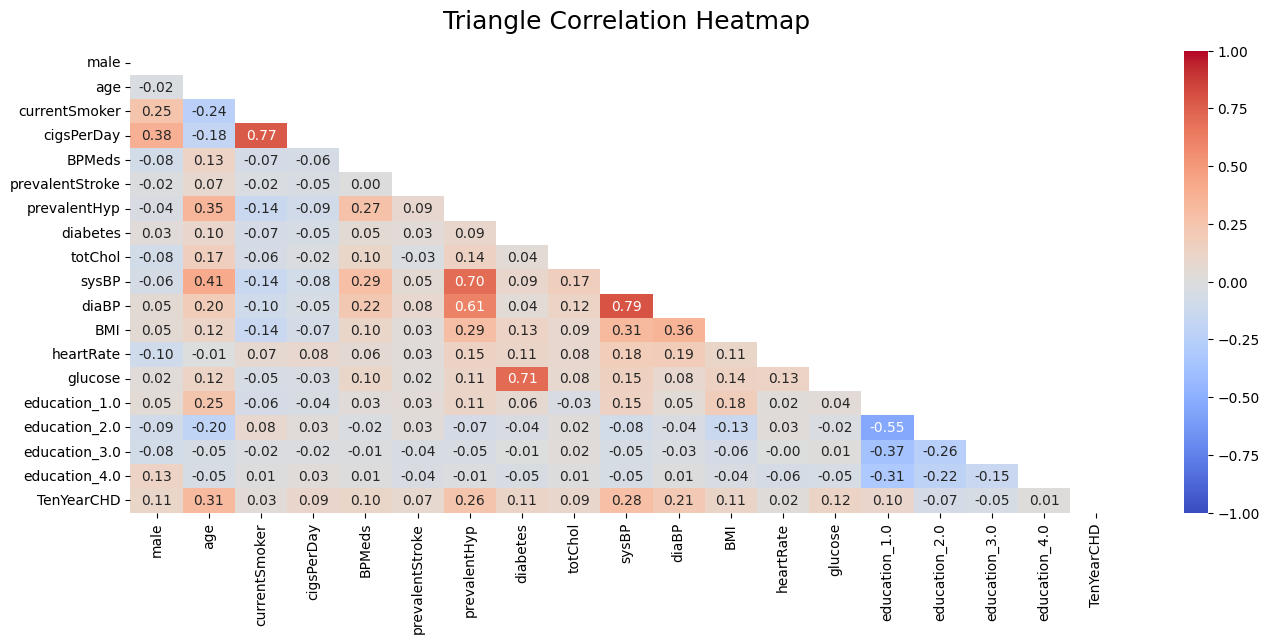

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
mask = np.triu(np.ones_like(train_set.corr(), dtype= bool))

heatmap = sns.heatmap(train_set.corr(), mask= mask, vmin= -1, vmax= 1, annot= True, cmap= "coolwarm", fmt= ".2f")
heatmap.set_title("Triangle Correlation Heatmap", fontdict= {"fontsize": 18}, pad= 16)
plt.show()

only ap_hi and ap_lo have a quite high positive correlation. There is a 0.50 correlation between height and gender.

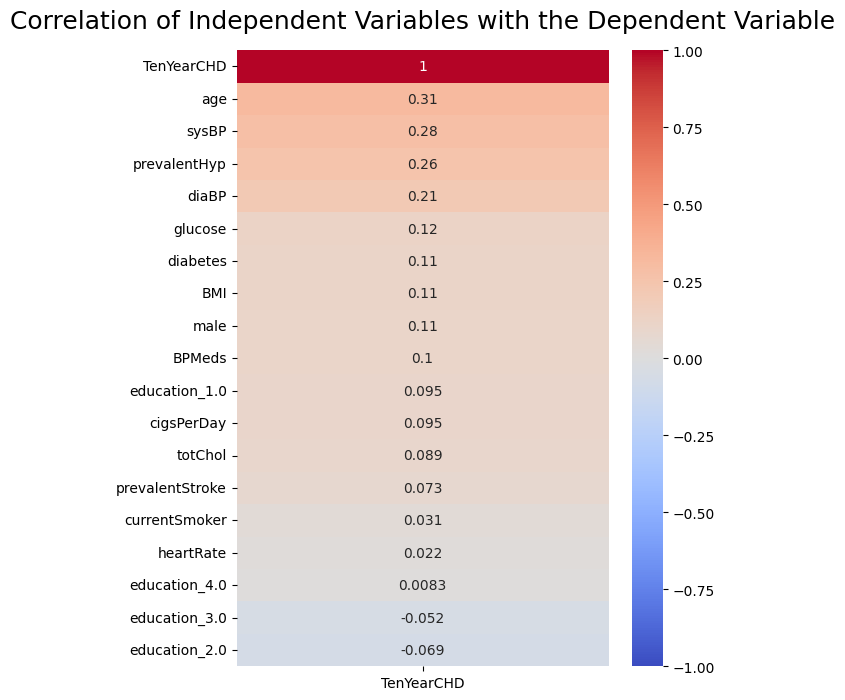

In [ ]:
# correlation of indepenedent variables with the dependent variable
plt.figure(figsize=(6,8))
heatmap = sns.heatmap(train_set.corr()[["TenYearCHD"]].sort_values(by= "TenYearCHD", ascending= False), vmin= -1, vmax= 1, annot= True, cmap= "coolwarm")
heatmap.set_title("Correlation of Independent Variables with the Dependent Variable", fontdict= {"fontsize": 18}, pad= 16)
plt.show()

# Machine Learning Models

In [ ]:
# import all necessary models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve


In [ ]:
# model 1
m1 = "Logistic Regression"
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)
print("confussion matrix")
print(lr_conf_matrix)
print("\n")
print("Accuracy of Logistic Regression model:",lr_acc_score*100, "\n")
print(classification_report(y_test, lr_predict))

confussion matrix
[[464 261]
 [ 46  77]]


Accuracy of Logistic Regression model: 63.79716981132076 

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       725
           1       0.23      0.63      0.33       123

    accuracy                           0.64       848
   macro avg       0.57      0.63      0.54       848
weighted avg       0.81      0.64      0.69       848



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# model 2
m2 = "Naive Bayes"
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_conf_matrix = confusion_matrix(y_test, nb_pred)
nb_acc_score = accuracy_score(y_test, nb_pred)
print("confussion matrix")
print(nb_conf_matrix)
print("\n")
print("Accuracy of Naive Bayes model:", nb_acc_score*100, "\n")
print(classification_report(y_test, nb_pred))

confussion matrix
[[665  60]
 [ 92  31]]


Accuracy of Naive Bayes model: 82.0754716981132 

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       725
           1       0.34      0.25      0.29       123

    accuracy                           0.82       848
   macro avg       0.61      0.58      0.59       848
weighted avg       0.80      0.82      0.81       848



In [ ]:
# model 3
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score*100, "\n")
print(classification_report(y_test, rf_predicted))

confussion matrix
[[500 225]
 [ 52  71]]


Accuracy of Random Forest model: 67.33490566037736 

              precision    recall  f1-score   support

           0       0.91      0.69      0.78       725
           1       0.24      0.58      0.34       123

    accuracy                           0.67       848
   macro avg       0.57      0.63      0.56       848
weighted avg       0.81      0.67      0.72       848



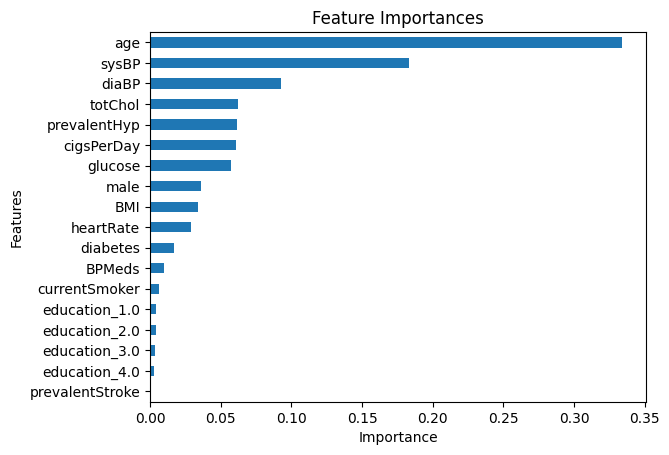

Feature importances and model saved successfully.


In [ ]:
# Calculate and plot feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')  # Using sort_values() for correct sorting
plt.title("Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

# Save feature importances to CSV
feature_importances.to_csv("feature_importances.csv")

# Save the trained CVD risk model as a .pkl file
import joblib
cvd_risk_model = rf  # rf is your trained random forest model
joblib.dump(cvd_risk_model, "cvd_risk_model.pkl")

print("Feature importances and model saved successfully.")


In [ ]:
m4 = 'Extreme Gradient Boost'
xgb = XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15,gamma=0.6, subsample=0.52,colsample_bytree=0.6,seed=27,
                    reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5)
xgb.fit(X_train, y_train)
xgb_predicted = xgb.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, xgb_predicted)
xgb_acc_score = accuracy_score(y_test, xgb_predicted)
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("Accuracy of Extreme Gradient Boost:",xgb_acc_score*100,'\n')
print(classification_report(y_test,xgb_predicted))

confussion matrix
[[581 144]
 [ 67  56]]


Accuracy of Extreme Gradient Boost: 75.11792452830188 

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       725
           1       0.28      0.46      0.35       123

    accuracy                           0.75       848
   macro avg       0.59      0.63      0.60       848
weighted avg       0.81      0.75      0.77       848



In [ ]:
m5 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

confussion matrix
[[511 214]
 [ 68  55]]


Accuracy of K-NeighborsClassifier: 66.74528301886792 

              precision    recall  f1-score   support

           0       0.88      0.70      0.78       725
           1       0.20      0.45      0.28       123

    accuracy                           0.67       848
   macro avg       0.54      0.58      0.53       848
weighted avg       0.78      0.67      0.71       848



In [ ]:
m6 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)
print("confussion matrix")
print(dt_conf_matrix)
print("\n")
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')
print(classification_report(y_test,dt_predicted))

confussion matrix
[[460 265]
 [ 40  83]]


Accuracy of DecisionTreeClassifier: 64.03301886792453 

              precision    recall  f1-score   support

           0       0.92      0.63      0.75       725
           1       0.24      0.67      0.35       123

    accuracy                           0.64       848
   macro avg       0.58      0.65      0.55       848
weighted avg       0.82      0.64      0.69       848



In [ ]:
m7 = 'Support Vector Classifier'
svc =  SVC(kernel='rbf', C=2)
svc.fit(X_train, y_train)
svc_predicted = svc.predict(X_test)
svc_conf_matrix = confusion_matrix(y_test, svc_predicted)
svc_acc_score = accuracy_score(y_test, svc_predicted)
print("confussion matrix")
print(svc_conf_matrix)
print("\n")
print("Accuracy of Support Vector Classifier:",svc_acc_score*100,'\n')
print(classification_report(y_test,svc_predicted))

confussion matrix
[[485 240]
 [ 50  73]]


Accuracy of Support Vector Classifier: 65.80188679245283 

              precision    recall  f1-score   support

           0       0.91      0.67      0.77       725
           1       0.23      0.59      0.33       123

    accuracy                           0.66       848
   macro avg       0.57      0.63      0.55       848
weighted avg       0.81      0.66      0.71       848



In [ ]:
# fine tuning the random forest model (Manual from towards data science)
# model 3
m3 = "Random Forest Classifier"
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf_acc_score*100, "\n")
print(classification_report(y_test, rf_predicted))

# with pprint you can see the default parameters of a model:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())


confussion matrix
[[702  23]
 [112  11]]


Accuracy of Random Forest model: 84.08018867924528 

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       725
           1       0.32      0.09      0.14       123

    accuracy                           0.84       848
   macro avg       0.59      0.53      0.53       848
weighted avg       0.78      0.84      0.80       848

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
# tuning a model, using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# random grid for the predefined parameters
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# with this one can use the random grid to search for best hyperparameters
# first create the base model to tune
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# fit the random search
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced', 'balanced_subsample']
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    scoring='f1',  # Focus on F1-score for imbalanced data
    cv=5,
    verbose=2,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

# Use the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(scale_pos_weight=(len(y_train) / sum(y_train)), random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate performance metrics
xgb_conf_matrix = confusion_matrix(y_test, y_pred_xgb)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

# Print performance metrics
print("XGBoost Classifier\n")
print("Confusion Matrix:")
print(xgb_conf_matrix)
print("\n")

print("Accuracy of XGBoost Model:", xgb_accuracy * 100, "%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the Logistic Regression model
logreg_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_model.predict(X_test)

# Calculate performance metrics
logreg_conf_matrix = confusion_matrix(y_test, y_pred_logreg)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)

# Print performance metrics
print("\nLogistic Regression\n")
print("Confusion Matrix:")
print(logreg_conf_matrix)
print("\n")

print("Accuracy of Logistic Regression Model:", logreg_accuracy * 100, "%\n")

print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))

# documentation of random search CV
n_iter: controls the number of different combinations to try

cv: which number of folds to use for cross validation

More iterations = wider search space, more cv folds reduces the chance of overfitting, increasing leads to increaed run times

In [ ]:
# view the best parameters
rf_random.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
# evaluate the optimized model
m3 = "Random Forest Classifier"
rf2 = RandomForestClassifier(n_estimators = 1600, min_samples_split = 2, min_samples_leaf = 4, max_features = "sqrt", max_depth = 20, bootstrap = True, random_state=42)
rf2.fit(X_train,y_train)
rf2_predicted = rf2.predict(X_test)
rf2_conf_matrix = confusion_matrix(y_test, rf2_predicted)
rf2_acc_score = accuracy_score(y_test, rf2_predicted)
print("confussion matrix")
print(rf2_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf2_acc_score*100, "\n")
print(classification_report(y_test, rf2_predicted))


In [ ]:
# feature importance --> to be optimized this based on random forest
importances = rf2.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,5))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]) ,features)
plt.xticks(rotation=90)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define refined hyperparameters
n_estimators = [100, 300, 500, 700, 1000]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Refined random grid
random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

# Instantiate RandomForest and RandomizedSearchCV
rf3 = RandomForestClassifier(random_state=42)
rf3_random = RandomizedSearchCV(estimator=rf3, param_distributions=random_grid,
                               n_iter=50, cv=5, verbose=2, random_state=42,
                               n_jobs=-1, scoring='roc_auc')

# Fit the model
rf3_random.fit(X_train, y_train)

In [ ]:
rf3_random.best_params_

In [ ]:
# evaluate the optimized model again

rf4 = RandomForestClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 1, max_features = "sqrt", max_depth = 10, bootstrap = True, random_state=42)
rf4.fit(X_train,y_train)
rf4_predicted = rf4.predict(X_test)
rf4_conf_matrix = confusion_matrix(y_test, rf4_predicted)
rf4_acc_score = accuracy_score(y_test, rf4_predicted)
print("confussion matrix")
print(rf2_conf_matrix)
print("\n")
print("Accuracy of Random Forest model:", rf4_acc_score*100, "\n")
print(classification_report(y_test, rf4_predicted))

In [ ]:
# feature importance --> to be optimized this based on random forest
importances = rf4.feature_importances_
indices = np.argsort(importances)[::-1]
features = X_train.columns

plt.figure(figsize=(10,5))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices])
plt.xticks(range(X_train.shape[1]) ,features)
plt.xticks(rotation=90)
plt.show()

# safe the model and feature importance

In [ ]:
cvd_risk_model = rf
# save the model as pkl

import joblib
joblib.dump(cvd_risk_model, "cvd_risk_model.pkl")


# save the nodel importances



In [ ]:
# emr bots! artificial generated electronics medical records
# cdss in r or ython,

# exercise folder moodle

# 100 patients folder

In [ ]:
# min max scaler!